In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Salary_Data.csv')

In [6]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
df['Salary'].max()

122391.0

### Seperate the input and output variables

In [12]:
x = df[['YearsExperience']]  # iputdata should be two dimentional
y = df['Salary']

### Explore data

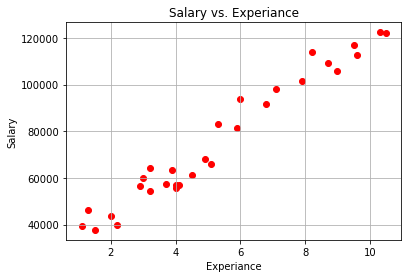

In [13]:
plt.title('Salary vs. Experiance')
plt.grid()
plt.ylabel('Salary')
plt.xlabel('Experiance')
plt.scatter(x,y, color='r');

In [15]:
df.corr()  #correlation coefficient  

# 1 indicates a perfect positive linear relationship,
# 0 indicates no linear relationship, and
# -1 indicates a perfect negative linear relationship

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Cross validation

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test , y_train, y_test = train_test_split(x,y, random_state=0)  # 25 percent -testing and 75 percent training defualt

In [20]:
x_train.shape

(22, 1)

In [21]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


## Build the machine learning model  (Linear Regression model)

In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
#create an objecr 
regressor = LinearRegression()

In [25]:
# train model
regressor.fit(x_train, y_train)

LinearRegression()

In [26]:
# slope
regressor.coef_

array([9379.71049195])

In [27]:
# y-intercept
regressor.intercept_

26986.691316737248

## Predinct on unseen data

In [29]:
regressor.predict([[12]])

array([139543.21722009])

#### Perform Evaluation

In [31]:
# predint on the tesrt dataset
y_pred = regressor.predict(x_test)

In [32]:
result =pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [33]:
result

,Actual,Predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [34]:
import numpy as np

In [35]:
# mean absolute erros
np.mean(abs(y_test - y_pred))

3508.5455930660555

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error (y_test, y_pred)

0.05754512646779697

In [39]:
# accuracy of linearity / r-squared error
regressor.score(x_train, y_train)

0.9395413526983522

In [40]:
# accuracy of linearity / r-squared error
regressor.score(x_test, y_test)

0.9779208335417602

In [41]:
# predint the result using model
y_pred = regressor.predict(x)

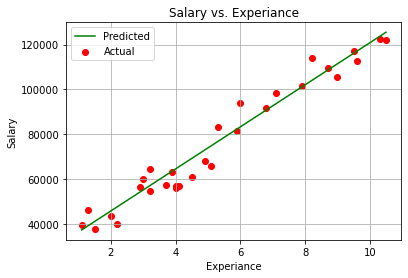

In [43]:
plt.title('Salary vs. Experiance')
plt.grid()
plt.ylabel('Salary')
plt.xlabel('Experiance')
plt.scatter(x,y, color='r', label = 'Actual');
plt.plot(x,y_pred, color='g', label="Predicted")
plt.legend()

In [44]:
regressor.predict([[15]])   # it is equal to  =>  15 * regressor.coef_[0] + regressor.intercept_

array([167682.34869593])

In [45]:
15 * regressor.coef_[0] + regressor.intercept_

167682.34869592747

In [46]:
regressor.score(x,y)

0.955975487542377